In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [49]:


loadedData = pd.read_csv('Desktop\BankChurners.csv', sep=",")
print("Размер датасета:", loadedData.shape)
loadedData.head()



Размер датасета: (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [50]:
data_features = list(zip(
# признаки
[i for i in loadedData.columns],
zip(
    # типы колонок
    [str(i) for i in loadedData.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in loadedData.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('CLIENTNUM', ('int64', 0)),
 ('Attrition_Flag', ('object', 0)),
 ('Customer_Age', ('int64', 0)),
 ('Gender', ('object', 0)),
 ('Dependent_count', ('int64', 0)),
 ('Education_Level', ('object', 0)),
 ('Marital_Status', ('object', 0)),
 ('Income_Category', ('object', 0)),
 ('Card_Category', ('object', 0)),
 ('Months_on_book', ('int64', 0)),
 ('Total_Relationship_Count', ('int64', 0)),
 ('Months_Inactive_12_mon', ('int64', 0)),
 ('Contacts_Count_12_mon', ('int64', 0)),
 ('Credit_Limit', ('float64', 0)),
 ('Total_Revolving_Bal', ('int64', 0)),
 ('Avg_Open_To_Buy', ('float64', 0)),
 ('Total_Amt_Chng_Q4_Q1', ('float64', 0)),
 ('Total_Trans_Amt', ('int64', 0)),
 ('Total_Trans_Ct', ('int64', 0)),
 ('Total_Ct_Chng_Q4_Q1', ('float64', 0)),
 ('Avg_Utilization_Ratio', ('float64', 0)),
 ('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
  ('float64', 0)),
 ('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Cont

In [51]:

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()



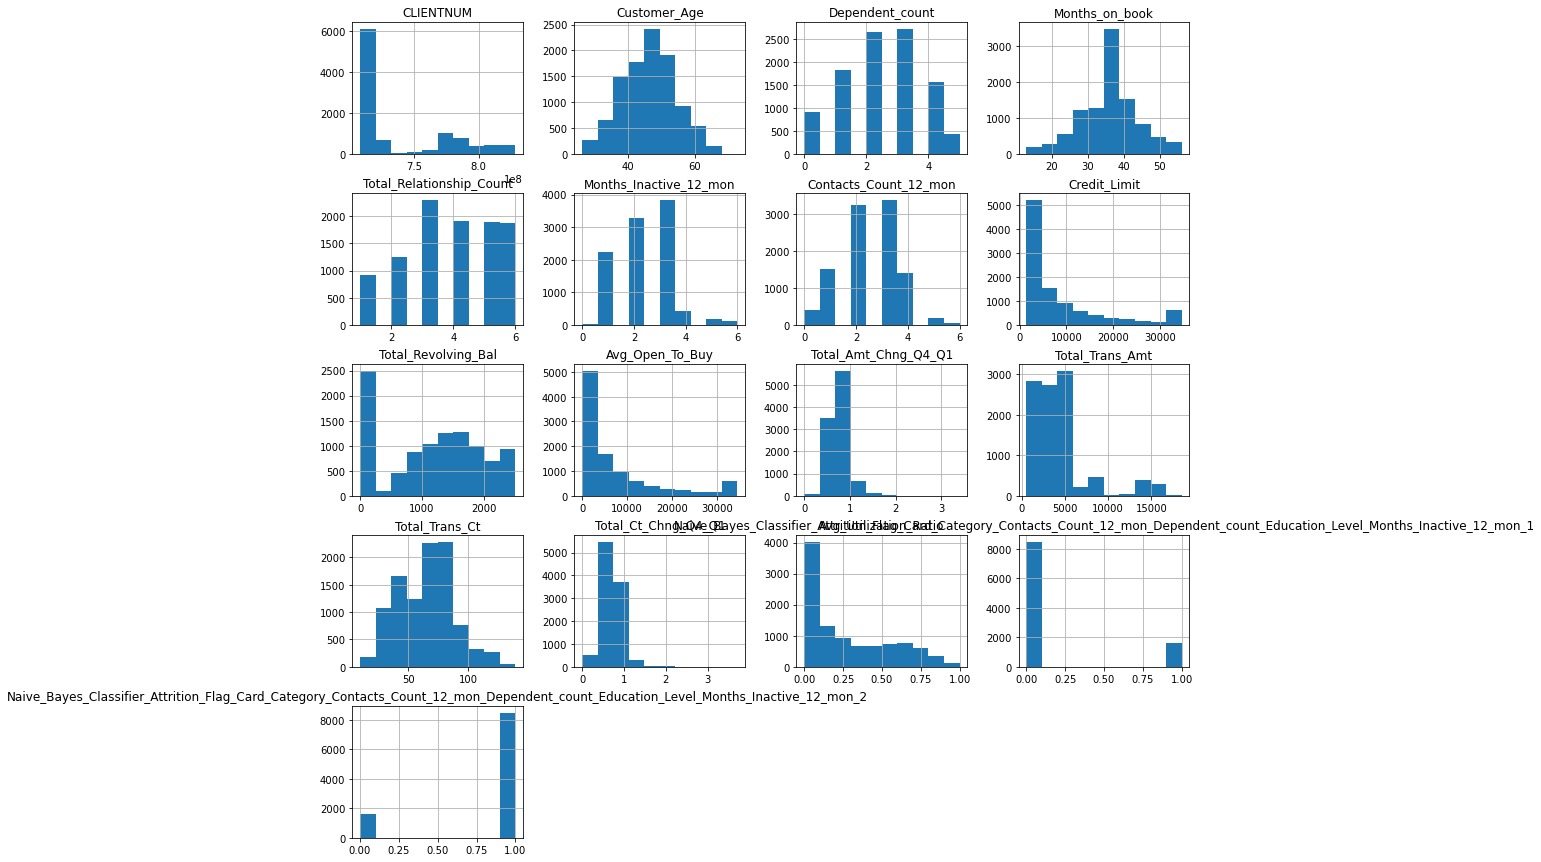

In [52]:


loadedData.hist(figsize=(15,15));



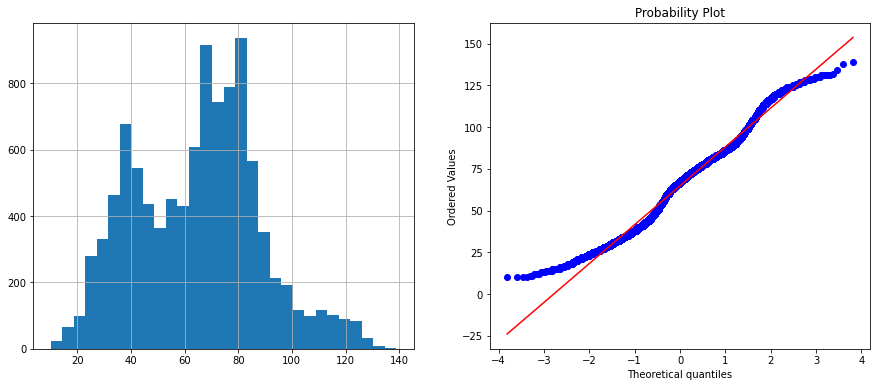

In [35]:
diagnostic_plots(loadedData, 'Total_Trans_Ct')

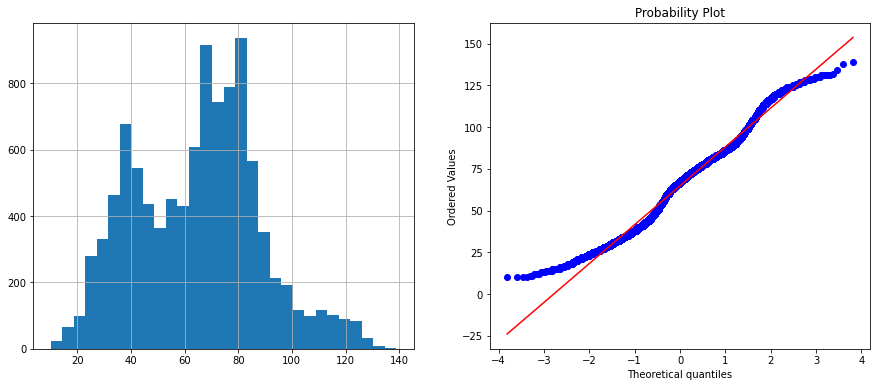

In [53]:
loadedData['Total_Trans_Ct_sqrt'] = loadedData['Total_Trans_Ct']**(1/2) 
diagnostic_plots(loadedData, 'Total_Trans_Ct')

# Отбора признаков (feature selection).Через метод вложений (embedded method). Используя подход на основе линейной регрессии

In [60]:


X = loadedData.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'])
y = loadedData['Avg_Utilization_Ratio']




In [61]:
feature_names = [i for i in X.columns]
feature_names



['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Total_Trans_Ct_sqrt']

In [62]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X, y)
# Коэффициенты регрессии
list(zip(feature_names, e_ls1.coef_))

[('CLIENTNUM', 1.4100681012215398e-11),
 ('Customer_Age', -0.0),
 ('Dependent_count', -0.0),
 ('Months_on_book', -0.0),
 ('Total_Relationship_Count', 0.0),
 ('Months_Inactive_12_mon', 0.0),
 ('Contacts_Count_12_mon', -0.0),
 ('Credit_Limit', -6.746218897352585e-06),
 ('Total_Revolving_Bal', 0.00020909656968854726),
 ('Avg_Open_To_Buy', -8.541531517108416e-06),
 ('Total_Amt_Chng_Q4_Q1', 0.0),
 ('Total_Trans_Amt', -2.985859277753538e-06),
 ('Total_Trans_Ct', 0.0),
 ('Total_Ct_Chng_Q4_Q1', 0.0),
 ('Avg_Utilization_Ratio', 0.0),
 ('Total_Trans_Ct_sqrt', 0.0)]

In [63]:
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X, y)
list(zip(feature_names, sel_e_ls1.get_support()))

[('CLIENTNUM', False),
 ('Customer_Age', False),
 ('Dependent_count', False),
 ('Months_on_book', False),
 ('Total_Relationship_Count', False),
 ('Months_Inactive_12_mon', False),
 ('Contacts_Count_12_mon', False),
 ('Credit_Limit', False),
 ('Total_Revolving_Bal', True),
 ('Avg_Open_To_Buy', False),
 ('Total_Amt_Chng_Q4_Q1', False),
 ('Total_Trans_Amt', False),
 ('Total_Trans_Ct', False),
 ('Total_Ct_Chng_Q4_Q1', False),
 ('Avg_Utilization_Ratio', False),
 ('Total_Trans_Ct_sqrt', False)]

In [ ]:
#Построить "ящик с усами" для произвольной колонки

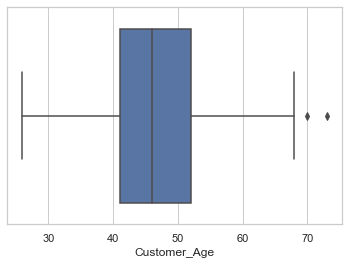

In [67]:


sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=loadedData["Customer_Age"])



KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000213B3159430> (for post_execute):


KeyboardInterrupt: 